In [1]:
# imports
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import radia as rad
import imaids
from imaids.magicfingers import MagicFingers

In [2]:
mags = [1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, -1.3, -1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, -1.3, 1e-10, -1.3, -1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, -1.3, -1.3, 1e-10, -1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, -1.3, -1.3, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10]

mags_list_e = mags[:40]
mags_list_s = mags[40:]

In [3]:
# Points for calculating fields.
xmin, xmax, xnpts = -10, 10, 21
zmin, zmax, znpts = -900, 900, 3601
x = np.linspace(xmin, xmax, xnpts)
z = np.linspace(zmin, zmax, znpts)

# magic parameters
fase = 4.33
nr_blocks_group = 10
block_length = 3
block_height = 8
block_nseg = 2
block_distance = 3*2
group_distance = 24/2 + 8/2 + 8/2
nr_groups = 2
row_distance = 6
nr_rows = 2

block_shape = [[1.5, 0], [-1.5, 0], [-1.5, -8], [1.5, -8]]

In [4]:
magnetization_init_list_s = [[0, m, 0] for m in mags_list_s]
magnetization_init_list_s = np.array(magnetization_init_list_s)
magnetization_init_list_s = magnetization_init_list_s.reshape(nr_groups*nr_rows*nr_blocks_group,3).tolist()

magic_saida = MagicFingers(nr_blocks_group, block_shape, block_length, block_height, block_distance, block_nseg,
            group_distance, nr_groups, row_distance, nr_rows, magnetization_init_list_s,
            ksipar=0.06, ksiper=0.17, group_rotation=np.pi/2,
            block_shift_list=None, group_shift_list=[0,0,fase,fase],
            device_rotation=0, device_position = 487+1.5+3,
            block_subdivision=None, rectangular=False, 
            init_radia_object=True,cylinder=True, name='', block_names=None)

magic_saida.shift([-1.7,0,0])
magic_saida.solve()
magic_saida.draw()

magnetization_init_list_e = [[0, m, 0] for m in mags_list_e]
magnetization_init_list_e = np.array(magnetization_init_list_e)
magnetization_init_list_e = magnetization_init_list_e.reshape(nr_groups*nr_rows*nr_blocks_group,3).tolist()

magic_entrada = MagicFingers(nr_blocks_group, block_shape, block_length, block_height, block_distance, block_nseg,
            group_distance, nr_groups, row_distance, nr_rows, magnetization_init_list_e,
            ksipar=0.06, ksiper=0.17, group_rotation=np.pi/2,
            block_shift_list=None, group_shift_list=[0,0,-fase,-fase],
            device_rotation=0, device_position = 487+1.5+3,
            block_subdivision=None, rectangular=False, 
            init_radia_object=True,cylinder=True, name='', block_names=None)

magic_entrada.rotate([0,0,0], [0,1,0], np.pi)

magic_entrada.shift([-1.7,0,0])
magic_entrada.solve()
magic_entrada.draw()

True

In [5]:
# Measurement
_kwargs = {
        'op1':{'nr_periods':18, 'period_length':50, 'gap':24},
    }
option = 'op1'
prefix = 'check_field'

filename = '2023-05-26_PAPU_Fieldmap_X=-10_10mm_Z=-900_900mm_Y=0mm_ID=4635_Phase=4.33mm.dat'

model = imaids.insertiondevice.InsertionDeviceData(**_kwargs[option])
model.read_file(filename=filename)
model.correct_angles()
model.correct_cross_talk()

In [6]:
# Integrals Measurement
ibx = []
iby = []
ibz = []
iibx = []
iiby = []
iibz = []

for xp in x:
    field = model.get_field(x=xp, y=0, z=z)
    ib, iib = model.calc_field_integrals(z_list=z, x=xp, y=0, field_list=field)
    ibx.append(ib[-1,0])
    iby.append(ib[-1,1])
    ibz.append(ib[-1,2])
    iibx.append(iib[-1,0])
    iiby.append(iib[-1,1])
    iibz.append(iib[-1,2])

In [7]:
# Integrals Magic
ibx_ms = []
iby_ms = []
ibz_ms = []
iibx_ms = []
iiby_ms = []
iibz_ms = []

for xp in x:
    field = magic_saida.get_field(x=xp, y=0, z=z)
    ib, iib = magic_saida.calc_field_integrals(z_list=z, x=xp, y=0, field_list=field)
    ibx_ms.append(ib[-1,0])
    iby_ms.append(ib[-1,1])
    ibz_ms.append(ib[-1,2])
    iibx_ms.append(iib[-1,0])
    iiby_ms.append(iib[-1,1])
    iibz_ms.append(iib[-1,2])
    
# Integrals Magic
ibx_me = []
iby_me = []
ibz_me = []
iibx_me = []
iiby_me = []
iibz_me = []

for xp in x:
    field = magic_entrada.get_field(x=xp, y=0, z=z)
    ib, iib = magic_entrada.calc_field_integrals(z_list=z, x=xp, y=0, field_list=field)
    ibx_me.append(ib[-1,0])
    iby_me.append(ib[-1,1])
    ibz_me.append(ib[-1,2])
    iibx_me.append(iib[-1,0])
    iiby_me.append(iib[-1,1])
    iibz_me.append(iib[-1,2])

In [8]:
def plot_results():
    fig, ax = plt.subplots(2,2,figsize=(9,7), constrained_layout=True)

    ix = [_ibx+_ibx_ms+_ibx_me for _ibx, _ibx_ms, _ibx_me in zip(ibx, ibx_ms, ibx_me)]
    iy = [_iby+_iby_ms+_iby_me for _iby, _iby_ms, _iby_me in zip(iby, iby_ms, iby_me)]

    iix = [_iibx+_iibx_ms+_iibx_me for _iibx, _iibx_ms, _iibx_me in zip(iibx, iibx_ms, iibx_me)]
    iiy = [_iiby+_iiby_ms+_iiby_me for _iiby, _iiby_ms, _iiby_me in zip(iiby, iiby_ms, iiby_me)]
    
    ax[0][0].plot(x, ibx, '.-', c='k', label='meas')
    ax[0][0].plot(x, ibx_ms, '.--', c='b', label='mf sim saida')
    ax[0][0].plot(x, ibx_me, '.--', c='r', label='mf sim entrada')
    ax[0][0].plot(x, ix, '.-', c='g', label='meas + mf sim')

    ax[1][0].plot(x, iibx, '.-', c='k', label='meas')
    ax[1][0].plot(x, iibx_ms, '.--', c='b', label='mf sim saida')
    ax[1][0].plot(x, iibx_me, '.--', c='r', label='mf sim entrada')
    ax[1][0].plot(x, iix, '.-', c='g', label='meas + mf sim')

    ax[0][1].plot(x, iby, '.-', c='k', label='meas')
    ax[0][1].plot(x, iby_ms, '.--', c='b', label='mf sim saida')
    ax[0][1].plot(x, iby_me, '.--', c='r', label='mf sim entrada')
    ax[0][1].plot(x, iy, '.-', c='g', label='meas + mf sim')

    ax[1][1].plot(x, iiby, '.-', c='k', label='meas')
    ax[1][1].plot(x, iiby_ms, '.--', c='b', label='mf sim saida')
    ax[1][1].plot(x, iiby_me, '.--', c='r', label='mf sim entrada')
    ax[1][1].plot(x, iiy, '.-', c='g', label='meas + mf sim')

    ax[0][0].set_ylabel(r'IBx ($G \cdot cm)$')
    ax[0][1].set_ylabel(r'IBy ($G \cdot cm)$')
    ax[1][0].set_ylabel(r'IIBx ($G \cdot cm)$')
    ax[1][1].set_ylabel(r'IIBy ($G \cdot cm)$')
    ax[1][0].set_xlabel('x (mm)')
    ax[1][1].set_xlabel('x (mm)') 
    ax[0][1].legend()

    for axi in ax:
        for a in axi:
            a.grid(c='silver')
            a.axhline(y=0, c='gray')
            a.axvline(x=0, c='gray')
    plt.show()

<IPython.core.display.Javascript object>


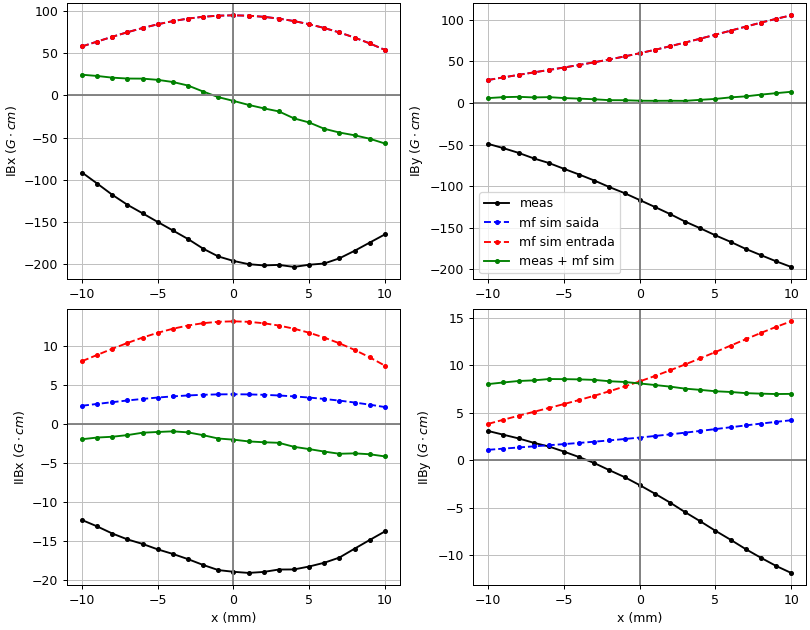

In [9]:
plot_results()

In [10]:
def plot_phase_error():
    energy = 3
    rkstep = 0.5

    model.add_field(magic_entrada)
    model.add_field(magic_saida)

    traj = model.calc_trajectory(energy, [0, 0, z[0], 0, 0, 1], z[-1], rkstep)
    bxamp, byamp, _, _ = model.calc_field_amplitude()
    zpe, pe, perms = model.calc_phase_error(energy, traj, bxamp, byamp, zmin=-440, zmax=430)
    
    model.sub_field(magic_entrada)
    model.sub_field(magic_saida)

    pe *= 180/np.pi
    perms *= 180/np.pi

    poles = list(range(1, len(pe)+1))

    plt.plot(poles, pe, '-o')
    plt.ylabel(r'Phase Error ($\mathbf{\phi)}$ [°]')
    plt.xlabel('Pole Number')
    plt.grid()

    print('Phase error [°]: ', perms)
    plt.show()

<IPython.core.display.Javascript object>


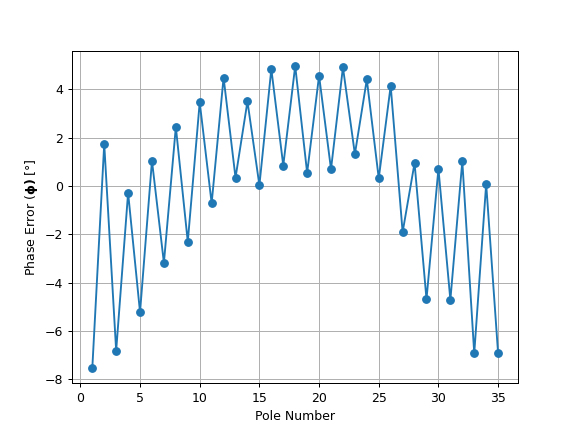

Phase error [°]:  3.7072533096226326


In [11]:
plot_phase_error()